 **Step 1: Install and Import Libraries**

In [1]:
# 💼 Employee Salary Prediction - Model Training Notebook

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


**Step 2: Load the Dataset**

In [2]:
# 2. Load Data
df = pd.read_csv("data/Salary Data.csv")
df.columns = df.columns.str.strip()  # Clean any extra spaces in column names
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


 **Step 3: Drop Duplicates and Missing Values**

In [3]:
# 3. Drop Duplicates and Missing Values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


 **Step 4: Label Encode Categorical Columns**

In [4]:
# 4. Label Encode Categorical Columns
label_encoders = {}
for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



 **Step 5: Select Features and Target**

In [5]:
# 5. Select Features and Target
X = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = df['Salary']



**Step 6: Scale Features**

In [6]:
# 6. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Step 7: Train-Test Split**

In [7]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Step 8: Train Linear Regression Model**

In [8]:
# 8. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**Step 9: Evaluate the Model**

In [9]:
# 9. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 205754135.72
R² Score: 0.89


**Step 10: Evaluation Plot**

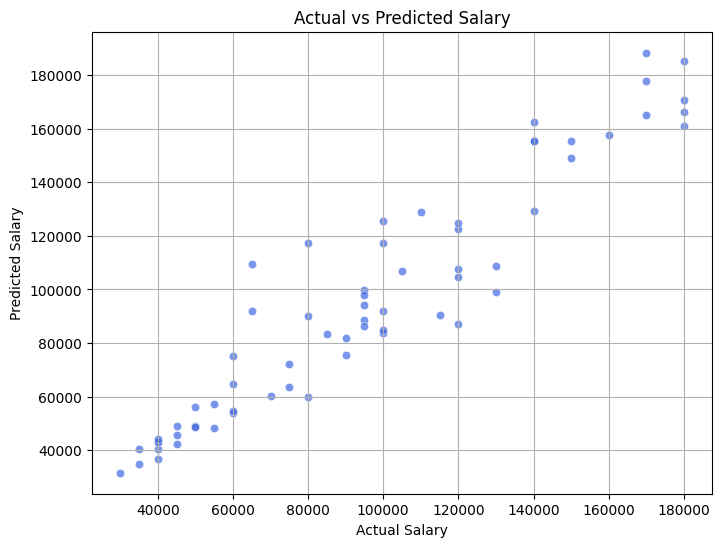

In [10]:
# Save plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='royalblue')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.savefig("evaluation_plot.png")
plt.show()


**Step 11: Save Model and Preprocessing Objects**

In [11]:
# 11. Save Model and Preprocessing Objects
model_data = {
    "model": model,
    "label_encoders": label_encoders,
    "scaler": scaler,
    "feature_names": X.columns.tolist()
}
joblib.dump(model_data, "salary_predictor.pkl")



['salary_predictor.pkl']

**Step 12: Save Score and MSE to Text Files**

In [12]:
# 12. Save Score and MSE to Text Files
with open("model_score.txt", "w") as f:
    f.write(str(r2))

with open("model_mse.txt", "w") as f:
    f.write(str(mse))
